/var/folders/5g/dxyz07h551b0md8v8dx0w1w80000gn/T/ipykernel_49870/2021809901.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_temp = pd.read_csv(berkeley_path, comment='%', delim_whitespace=True, header=None)


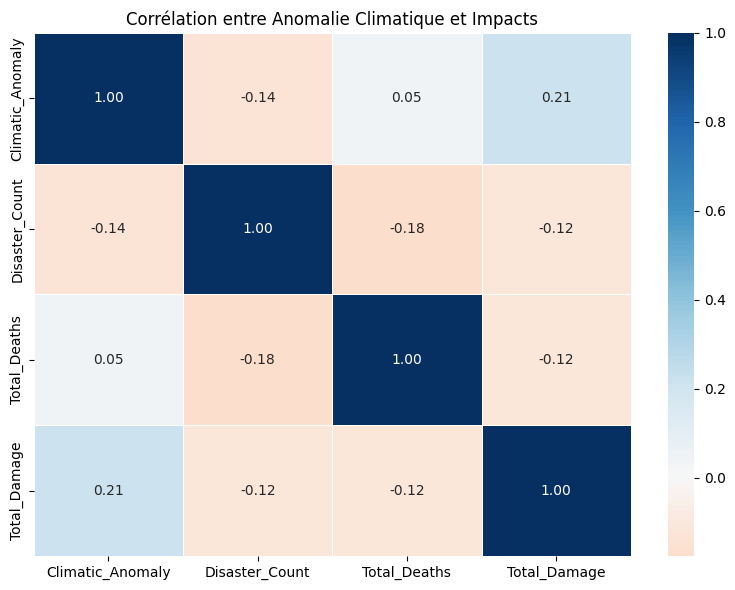

                            OLS Regression Results                            
Dep. Variable:         Disaster_Count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.252
Method:                 Least Squares   F-statistic:                    0.1956
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.897
Time:                        23:08:41   Log-Likelihood:                -4.7831
No. Observations:                  13   AIC:                             17.57
Df Residuals:                       9   BIC:                             19.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2457      0.203  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [4]:
# PHASE 4 - TP3 Climat : Analyse avancée & Interprétation

# -------------------------------
# Importations des bibliothèques
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# -------------------------------
# Chargement des fichiers sources

berkeley_path = "/Users/jeniferawounou/Desktop/france-(europe)-TAVG-Trend-bon.txt"
df_temp = pd.read_csv(berkeley_path, comment='%', delim_whitespace=True, header=None)

df_temp.columns = [
    "Year", "Month", "Monthly_Anomaly", "Monthly_Unc",
    "Annual_Anomaly", "Annual_Unc", "FiveYear_Anomaly", "FiveYear_Unc",
    "TenYear_Anomaly", "TenYear_Unc", "TwentyYear_Anomaly", "TwentyYear_Unc"
]
df_temp['Date'] = pd.to_datetime(dict(year=df_temp.Year, month=df_temp.Month, day=1))
emdat_path = "/Users/jeniferawounou/Desktop/public_emdat_custom_request_2025-04-01_955b1370-4c28-4320-97f2-9b207c3e884d.xlsx"

# Lecture du fichier Excel (après avoir installé openpyxl)
df_disasters = pd.read_excel("/Users/jeniferawounou/Desktop/public_emdat_custom_request_2025-04-01_955b1370-4c28-4320-97f2-9b207c3e884d.xlsx", engine="openpyxl")

df_disasters['Country'] = df_disasters['Country'].str.strip().str.lower()
df_france = df_disasters[df_disasters['Country'] == 'france']

# -------------------------------
# Fusion et préparation des données
# -------------------------------
df_disasters_yearly = df_france.groupby('Start Year').agg({
    'Disaster Type': 'count',
    'Total Deaths': 'sum',
    "Total Damage ('000 US$)": 'sum'
}).reset_index()
df_disasters_yearly.columns = ['Year', 'Disaster_Count', 'Total_Deaths', 'Total_Damage']

df_temp_filtered = df_temp[df_temp['Year'] >= 1900]
df_temp_yearly = df_temp_filtered.groupby('Year').agg({
    'Monthly_Anomaly': 'mean'
}).reset_index()

df_merged = pd.merge(df_temp_yearly, df_disasters_yearly, on='Year', how='inner')
df_clean = df_merged.dropna()

# -------------------------------
# Calcul des anomalies climatiques réelles
# -------------------------------
df_ref_period = df_temp[(df_temp['Year'] >= 1951) & (df_temp['Year'] <= 1980)]
mean_ref = df_ref_period.groupby('Year')['Monthly_Anomaly'].mean().mean()
df_clean['Climatic_Anomaly'] = df_clean['Monthly_Anomaly'] - mean_ref

# -------------------------------
# Corrélation avancée
# -------------------------------
correlation_matrix = df_clean[['Climatic_Anomaly', 'Disaster_Count', 'Total_Deaths', 'Total_Damage']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", center=0, linewidths=0.5, fmt=".2f")
plt.title("Corrélation entre Anomalie Climatique et Impacts")
plt.tight_layout()
plt.show()

# -------------------------------
# Régression multiple (modèle OLS)
# -------------------------------
X = df_clean[['Climatic_Anomaly', 'Total_Deaths', 'Total_Damage']]
y = df_clean['Disaster_Count']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# -------------------------------
# Export optionnel du résumé
# -------------------------------
with open("resume_modele_regression.txt", "w") as f:
    f.write(str(model.summary()))

In [6]:
# Recalcul de la colonne 'Climatic_Anomaly' si elle a été perdue

# Recalcul de la température de référence 1951–1980 à partir de df_temp
df_ref_period = df_temp[(df_temp['Year'] >= 1951) & (df_temp['Year'] <= 1980)]
mean_ref = df_ref_period.groupby('Year')['Monthly_Anomaly'].mean().mean()

# Ajout de la colonne d'anomalie climatique réelle
df_clean['Climatic_Anomaly'] = df_clean['Monthly_Anomaly'] - mean_ref

# On peut maintenant relancer la régression
import statsmodels.api as sm

X = df_clean[['Climatic_Anomaly', 'Total_Deaths', 'Total_Damage']]
y = df_clean['Disaster_Count']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Disaster_Count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                 -0.252
Method:                 Least Squares   F-statistic:                    0.1956
Date:                Tue, 08 Apr 2025   Prob (F-statistic):              0.897
Time:                        23:08:59   Log-Likelihood:                -4.7831
No. Observations:                  13   AIC:                             17.57
Df Residuals:                       9   BIC:                             19.83
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.2457      0.203      6.133      0.000       0.786       1.705
Climatic_Anomaly    -0.0639      0.205     -0.312      0.762      -0.528       0.400
Total_Deaths        -0.0032      0.006     -0.568      0.584      -0.016       0.010
Total_Damage      -1.02e-07   2.82e-07     -0.361      0.726   -7.41e-07    5.37e-07
==============================================================================
Omnibus:                       11.569   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.164
Skew:                           1.709   Prob(JB):                       0.0278
Kurtosis:                       4.241   Cond. No.                     1.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
!pip install statsmodels


  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 18.7 MB/s eta 0:00:00a 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
